In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('udemy_courses_clean.csv') 
df

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,Learn jQuery Scratch Master JavaScript library
3679,3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,Design WordPress Website Coding
3680,3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,Learn Build Polymer
3681,3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,CSS Animations Create Amazing Effects Website


#****subject****

In [4]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [5]:
len(df['subject'].unique())

4

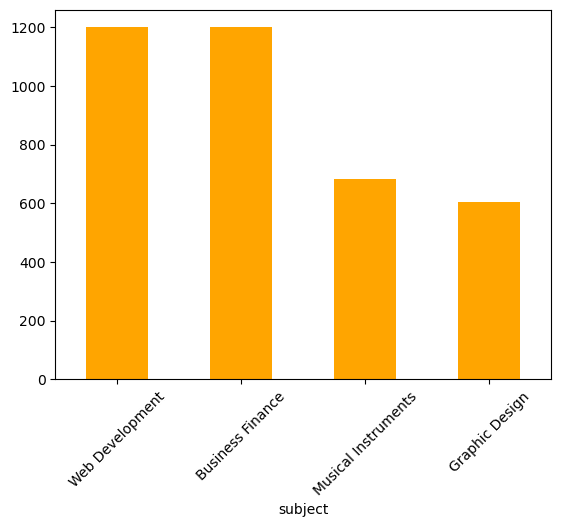

In [6]:
df['subject'].value_counts().plot(kind='bar',color='orange')
plt.xticks(rotation=45)
plt.show()

#****num_subscribers****

In [8]:
#Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

In [9]:
df['num_subscribers'].mean()

3193.3711648112953

In [10]:
df['num_subscribers'].min()

0

In [11]:
df['num_subscribers'].max()

268923

In [12]:
df['num_subscribers'].sum()

11761186

In [13]:
df['num_subscribers'].idxmax()

2832

In [14]:
#Location of The highest number of subscribers
df.iloc[2832]

Unnamed: 0                                                          2832
course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
clean_course_title                       Learn HTML

#****Level****

In [16]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [17]:
F=(df['level']=='52')
df[F]

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
2066,2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,Learn Classical Guitar Technique play Spanish ...


In [18]:
df['level'] = df['level'].replace('52','Unknown')

In [19]:
df['level'].value_counts()

level
All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Unknown                  1
Name: count, dtype: int64

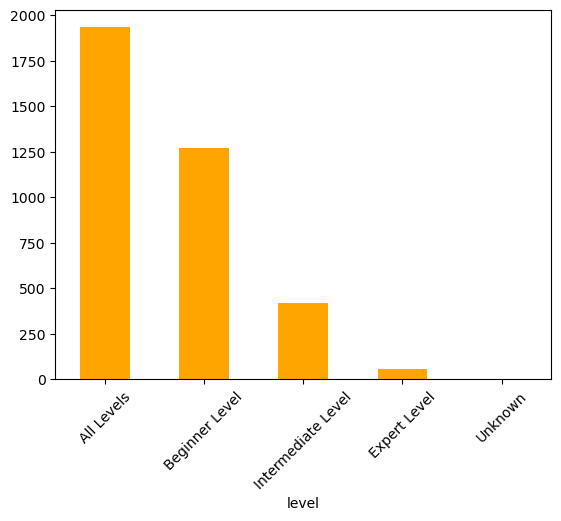

In [20]:
df['level'].value_counts().plot(kind='bar',color='orange')
plt.xticks(rotation=45)
plt.show()

In [21]:
#Number of subscribers per level
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Unknown                    30
Name: num_subscribers, dtype: int64

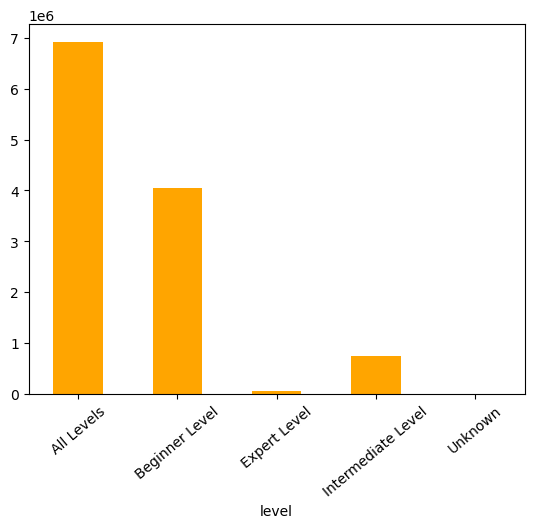

In [22]:
df.groupby('level')['num_subscribers'].sum().plot(kind='bar', color='Orange')
plt.xticks(rotation=40)
plt.show()

In [23]:
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
                     Unknown                 1
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: count, dtype: int64

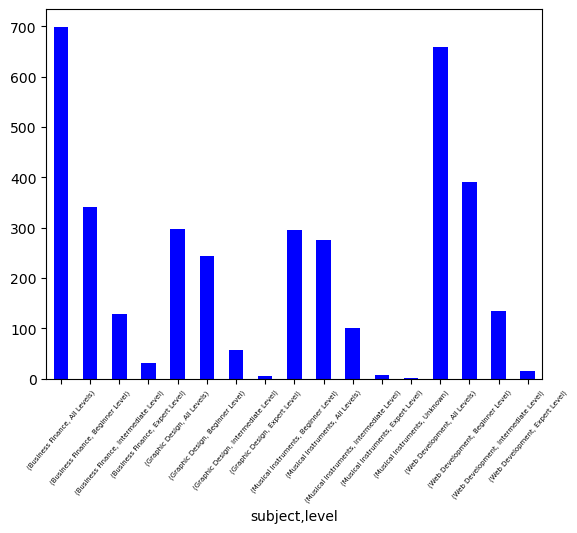

In [24]:
df.groupby('subject')['level'].value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation=50,fontsize=5)
plt.show()

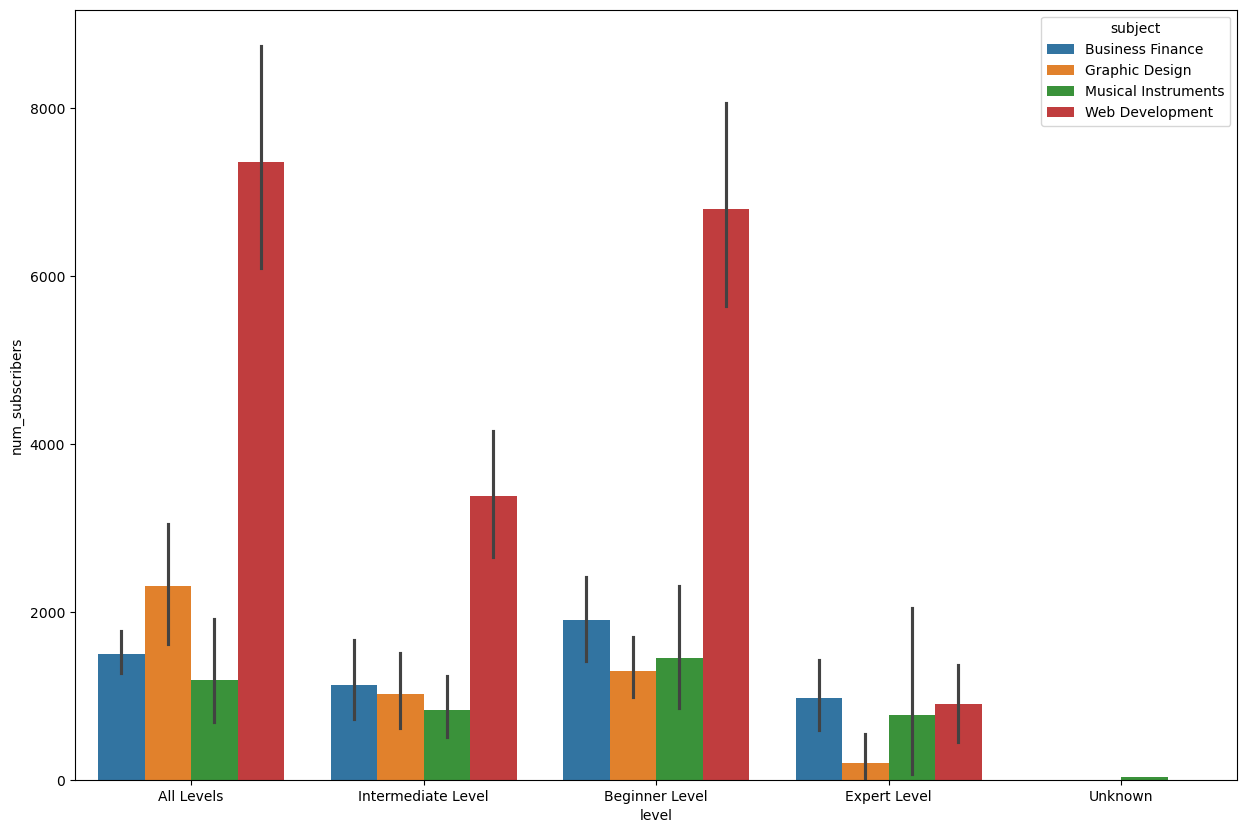

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='level',y='num_subscribers',data=df, hue='subject')
plt.show()

In [26]:
def func_draw(x):
    plt.figure(figsize=(20,10))
    sns.barplot(x='level',y=x, data=df,hue='subject')
    plt.title('plot of {} per level per subject'.format(x))
    plt.show()

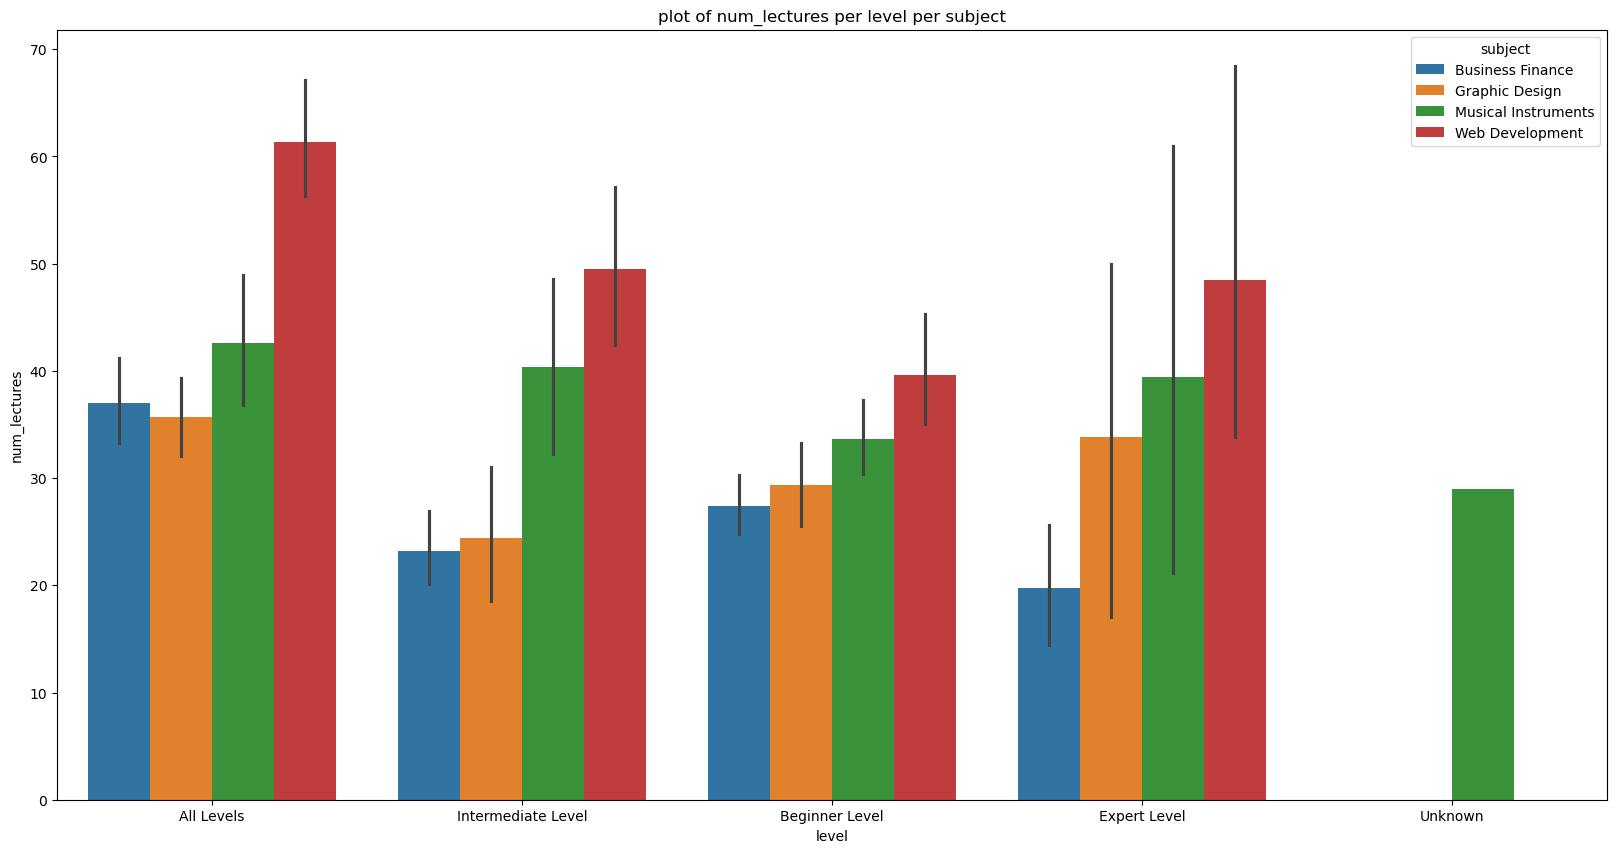

In [27]:
func_draw('num_lectures')

In [28]:
def func_pie(x):
    plt.figure(figsize=(5,5))
    df.groupby('level')[x].sum().plot(kind='pie')
    plt.title('plot of {} per level'.format(x))
    plt.show()

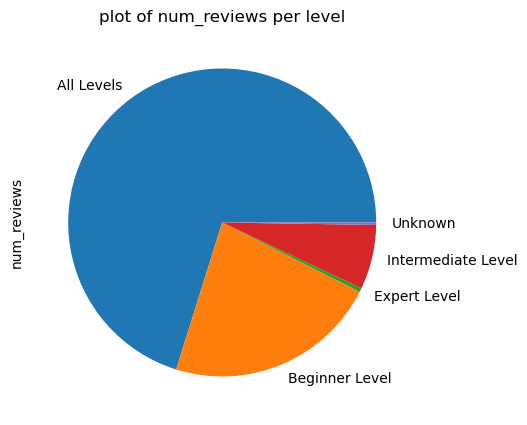

In [29]:
func_pie('num_reviews')

In [30]:
df['price'].dtype

dtype('O')

In [31]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [32]:
df['price'] = df['price'].str.replace('Free|TRUE', '0', regex=True)

In [33]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [34]:
df['price']=df['price'].astype(float)

In [35]:
df['price'].mean()

65.99239750203638

In [36]:
df['price'].max()

200.0

In [37]:
df['price'].min()

0.0

In [38]:
df['price'].idxmax()

0

In [39]:
#Location of the max price
df.iloc[0]

Unnamed: 0                                                             0
course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
clean_course_title                    Ultimate Inve

In [40]:
df['profit']=df['price']*df['num_subscribers']

In [41]:
df['profit'].tolist()

[429400.0,
 209400.0,
 97830.0,
 232845.0,
 255200.0,
 1383150.0,
 100100.0,
 277115.0,
 1008540.0,
 165400.0,
 856800.0,
 276000.0,
 108210.0,
 791895.0,
 58800.0,
 170700.0,
 98380.0,
 533200.0,
 267700.0,
 769025.0,
 161800.0,
 459000.0,
 761175.0,
 95800.0,
 112815.0,
 867900.0,
 1066800.0,
 700875.0,
 431550.0,
 143640.0,
 110675.0,
 368600.0,
 395865.0,
 206000.0,
 208200.0,
 1537380.0,
 3295500.0,
 2288200.0,
 4340115.0,
 1672125.0,
 4773795.0,
 743145.0,
 973245.0,
 861235.0,
 4039000.0,
 1506300.0,
 34865.0,
 2120600.0,
 227430.0,
 433950.0,
 316000.0,
 1007475.0,
 374500.0,
 186570.0,
 222600.0,
 498840.0,
 1114400.0,
 207785.0,
 18720.0,
 131600.0,
 852705.0,
 251220.0,
 1463975.0,
 651000.0,
 1469085.0,
 252000.0,
 1818000.0,
 631250.0,
 462000.0,
 1022680.0,
 806375.0,
 1177430.0,
 358600.0,
 64460.0,
 983100.0,
 297400.0,
 590200.0,
 323640.0,
 596850.0,
 79750.0,
 281200.0,
 680320.0,
 239160.0,
 735585.0,
 106700.0,
 242800.0,
 77400.0,
 429200.0,
 94380.0,
 211400.0,
 

In [42]:
df['profit'].max()

24316800.0

In [43]:
df['profit'].idxmax()

3235

In [44]:
df.iloc[3235]

Unnamed: 0                                                          3235
course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
clean_course_title                                W

In [45]:
df['is_paid'].value_counts()

is_paid
True                                           2738
TRUE                                            634
False                                           264
FALSE                                            46
https://www.udemy.com/learnguitartoworship/       1
Name: count, dtype: int64

In [46]:
paid_dic = {'True':True, 'TRUE':True, 'False': False, 'FALSE':False, 'https://www.udemy.com/learnguitartoworship/':True }  

In [47]:
df['is_paid']=df['is_paid'].map(paid_dic)

In [48]:
df['is_paid'].value_counts()

is_paid
True     3373
False     310
Name: count, dtype: int64

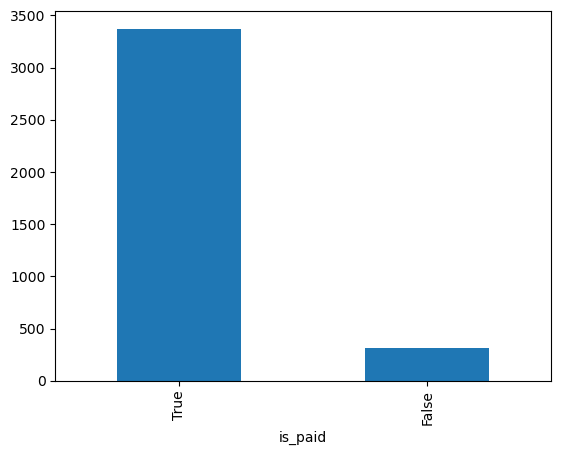

In [49]:
df['is_paid'].value_counts().plot(kind='bar')
plt.show()

In [50]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3678    2016-06-14T17:36:46Z
3679    2017-03-10T22:24:30Z
3680    2015-12-30T16:41:42Z
3681    2016-08-11T19:06:15Z
3682    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3683, dtype: object

In [51]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3678    [2016-06-14, 17:36:46Z]
3679    [2017-03-10, 22:24:30Z]
3680    [2015-12-30, 16:41:42Z]
3681    [2016-08-11, 19:06:15Z]
3682    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3683, dtype: object

In [52]:
df['Date_of_pub']=df['published_timestamp'].str.split('T').str[0]

In [53]:
df['Date_of_pub']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: Date_of_pub, Length: 3683, dtype: object

In [54]:
df

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title,profit,Date_of_pub
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course,429400.0,2017-01-18
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice,209400.0,2017-03-09
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants,97830.0,2016-12-19
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017,232845.0,2017-05-30
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options,255200.0,2016-12-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100.0,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,Learn jQuery Scratch Master JavaScript library,104000.0,2016-06-14
3679,3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25.0,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,Design WordPress Website Coding,7650.0,2017-03-10
3680,3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40.0,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,Learn Build Polymer,20520.0,2015-12-30
3681,3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50.0,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,CSS Animations Create Amazing Effects Website,15000.0,2016-08-11


In [55]:
df['Date_of_pub']= pd.to_datetime(df['Date_of_pub'],format='%Y-%m-%d')

ValueError: time data "3 hours" doesn't match format "%Y-%m-%d", at position 2066. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [56]:
#One of the rows in the dataset contained an invalid date format ("3 hours") that caused an error when parsing dates.  
df['Date_of_pub']=df['Date_of_pub'].str.replace('3 hours','2017-01-01')

In [58]:
df['Date_of_pub']= pd.to_datetime(df['Date_of_pub'],format='%Y-%m-%d')

In [60]:
df.dtypes

Unnamed: 0                      int64
course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration               object
published_timestamp            object
subject                        object
clean_course_title             object
profit                        float64
Date_of_pub            datetime64[ns]
dtype: object